In [2]:
import FranecReader as fr
import importlib
importlib.reload(fr)
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TypeError: 'NoneType' object is not subscriptable

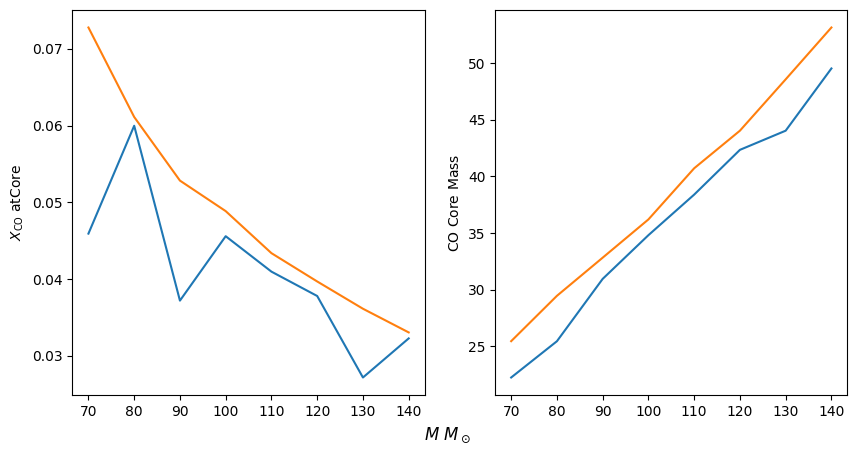

In [17]:
# fig, axes =  plt.subplots(1, 2, figsize=(10, 5), sharex=True)
# fig.supxlabel(r'$M\ M_\odot$')
# ax_c12 = axes[0]
# ax_co = axes[1]
# ax_c12.set_ylabel(r'$X_\mathrm{CO}\ \mathrm{at Core}$')
# ax_co.set_ylabel(r'$\mathrm{CO\ Core\ Mass}$')

for overshoot in [0, .5, 1.]:
    init_mass_arr = np.arange(70, 141, 10)
    CO_mass_core_arr = np.full(init_mass_arr.shape, np.nan)
    co_mass_list = []
    mf_c12_list = []
    for i, init_mass in enumerate(init_mass_arr):
        path = '/home/jiangrz/hdd23/INAC24G3/Over_%02d/%03d'%(overshoot*10, init_mass)
        hist = fr.bigtab(path)

        # read c core and o core mass from $path/grafica/gra_fisica
        graf = fr.gra_fisica(path)
        m_c = graf.data('M-Cs')
        m_o = graf.data('M-Os')

        # get model number of C ignition and He depeletion
        mod_c_ign = hist.when_c_ign()
        mod_a_dep = hist.when_he_depl()
        # print(mod_a_dep)
        # print(mod_c_ign)
        # read chi data file and f01 data file with path and model number
        chi_c_ign = fr.mod_chi(path, mod_c_ign)
        chi_a_dep = fr.mod_chi(path, mod_a_dep)
        f01_c_ign = fr.mod_f01(path, mod_c_ign)
        f01_a_dep = fr.mod_f01(path, mod_a_dep)
        # draw massfraction and energy generation from nuclear reaction
        # fr.draw_mf_and_eps(path, mod_a_dep)
        # find co core mass
        co_mass = chi_c_ign.co_core(crit_he=0.01)[1]
        co_mass_list.append(co_mass)
        # print('CO core mass: %.2f M_sol'%co_mass)
        
        # plt.figure()
        # chi_c_ign.draw_mf(nucs=["H", "He4", "C12", "Ne20", "O16"])
        # plt.vlines(co_mass, 0, 70, 'k', linestyles='--')
        # plt.text(15, 3e-3, f"{co_mass:.2f}");
        # find c12 mass frcaction
        mf_c12 = chi_a_dep.data('C12')[0]
        mf_c12_list.append(mf_c12)
        # print('Mass fraction of C12 in core: %.2f%%'%(mf_c12*100))

        # plt.figure()
        # chi_a_dep.draw_mf(nucs=["H", "He4", "C12", "Ne20", "O16"])
        # plt.text(10, mf_c12+0.01, f"{mf_c12:.2%}");

        # lkt = hist.look_back_time(np.where(hist.model == mod_c_ign)[0][0])
        # title = r'$\log(\tau_{-1}-\tau)+0.5$%.2f'%lkt
        # fr.mod.chi.draw_mf(
        #     nucs=["H", "he4"],
        #     title=title
        # )
    co_mass_arr = np.array(co_mass_list)
    mf_c12_arr = np.array(mf_c12_list)
    ax_c12.plot(init_mass_arr, mf_c12_arr)
    ax_co.plot(init_mass_arr, co_mass_arr, label=r'$\alpha_\mathrm{overshoot}=%.2f$'%overshoot)
fig.legend()

In [26]:
fr.mod_chi(path, mod_c_ign).co_core(0.1)

In [ ]:
for idx, mod in enumerate(hist.model):
    lkt = hist.look_back_time()[idx]
    title = r'$\log(\tau_{-1}-\tau)=$%.2f'%lkt
    chi_c_ign.draw_mf(
        nucs=["H", "He4", 'C12'],
        title=title
    )
    plt.savefig('EvoFig/%.png')

/ssd/jiangrz/GitHub/INAC24G3/FranecReader.py:245: RuntimeWarning: divide by zero encountered in log10
  age = np.log10(age)


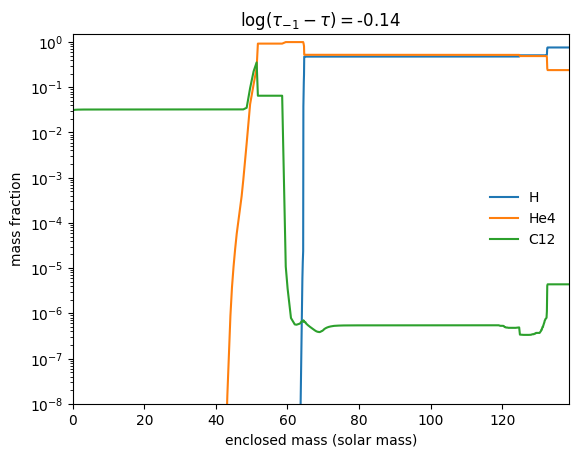